In [9]:
pip install xgboost

     |████████████████████████████████| 1.1MB 6.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [107]:
import numpy as np
import pandas as pd
import seaborn as sb
df1 = pd.read_csv("/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/training_set_VU_DM.csv")
df2 = pd.read_csv("/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/test_set_VU_DM.csv")

In [108]:
dfb_1 = df1[df1['booking_bool'] == 1].sample(5000)
dfb_0 = df1[df1['booking_bool'] == 0].sample(5000)
df = pd.concat([dfb_0, dfb_1])

In [109]:
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'
df.loc[(df['click_bool'] == 1) & (df['booking_bool'] == 1),'target'] = 1
df.loc[(df['click_bool'] == 0) & (df['booking_bool'] == 0),'target'] = 0
df.loc[(df['click_bool'] == 1) & (df['booking_bool'] == 0),'target'] = -1

In [110]:
df['prop_review_score']= df['prop_review_score'].fillna(df['prop_review_score'].median())
#dftest['prop_review_score']= dftest['prop_review_score'].fillna(dftest['prop_review_score'].median())

In [111]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [136]:
df = df.set_index(['prop_country_id', 'prop_id'])

In [137]:
# The columns that we will be making predictions with.
#X = ['position','srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']
X = ['srch_room_count','srch_length_of_stay','srch_booking_window','srch_destination_id','srch_children_count','srch_id','price_usd','prop_location_score1','visitor_location_country_id','prop_starrating','position','site_id','srch_adults_count','prop_review_score','prop_country_id, prop_id','prop_log_historical_price']
# The column that we want to predict.
y = ['target']
#including all the features
#X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [143]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance', 'random_bool',
       'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate',
       'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_per

In [144]:
data_dmatrix = xgb.DMatrix(data=df[X],label=df[y])

KeyError: "['prop_country_id, prop_id'] not in index"

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=1)

KeyError: "['prop_country_id, prop_id'] not in index"

In [123]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)

In [124]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

ValueError: feature_names mismatch: ['position', 'srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'prop_log_historical_price', 'price_usd', 'srch_destination_id'] []
expected srch_room_count, srch_length_of_stay, srch_booking_window, srch_destination_id, srch_children_count, srch_id, price_usd, prop_location_score1, visitor_location_country_id, prop_starrating, position, site_id, srch_adults_count, prop_review_score, prop_country_id, prop_id, prop_log_historical_price in input data

In [ ]:
X_test = pd.DataFrame()

In [125]:
predprob.dtype

dtype('float32')

In [122]:
predprob = xg_reg.predict_proba(X_test)

ValueError: feature_names mismatch: ['position', 'srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'prop_log_historical_price', 'price_usd', 'srch_destination_id'] []
expected srch_room_count, srch_length_of_stay, srch_booking_window, srch_destination_id, srch_children_count, srch_id, price_usd, prop_location_score1, visitor_location_country_id, prop_starrating, position, site_id, srch_adults_count, prop_review_score, prop_country_id, prop_id, prop_log_historical_price in input data

In [ ]:
pred = pd.DataFrame()
pred['srch_id'] = X_test['srch_id']
pred['predprob'] = predprob[:,1]

pred_sort = pd.DataFrame()
#A10_sort = pd.DataFrame()
# Sort
for i in X_test.srch_id:
    pred_sort = pd.concat([pred_sort,pred.loc[pred['srch_id']==i].sort_values(by='predprob',ascending=False)])

In [88]:
pred

,srch_id
2413677,162084
2964240,199081
4118844,276335
1473705,98817
39234,2605
746724,49941
3185817,213946
2109604,141570
2781676,186741
2670866,179218


ValueError: feature_names mismatch: ['position', 'srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'prop_log_historical_price', 'price_usd', 'srch_destination_id'] []
expected srch_room_count, srch_length_of_stay, srch_booking_window, srch_destination_id, srch_children_count, srch_id, price_usd, prop_location_score1, visitor_location_country_id, prop_starrating, position, site_id, srch_adults_count, prop_review_score, prop_country_id, prop_id, prop_log_historical_price in input data

In [77]:
predprob

array([[5.6669919e-04, 1.7730693e-03, 9.9766028e-01],
       [2.7295811e-02, 9.6934301e-01, 3.3611953e-03],
       [7.8080613e-03, 9.9021637e-01, 1.9756176e-03],
       ...,
       [5.1044743e-04, 9.6939824e-04, 9.9852020e-01],
       [2.8024284e-02, 9.6919864e-01, 2.7771262e-03],
       [7.0092538e-03, 9.9095178e-01, 2.0390188e-03]], dtype=float32)

In [76]:
X_test

,gross_bookings_usd,position,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_location_score1,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,prop_log_historical_price,price_usd,srch_destination_id
4802522,90.85,9,322273,5,219,219,53114,3,4.0,2.08,1,2,1,0,1,4.72,79.00,1715
4885272,NaN,18,327899,15,55,31,51665,4,4.0,6.95,5,133,2,3,2,5.63,173.25,16361
1116018,NaN,30,74494,5,219,219,130968,4,4.5,4.81,3,30,4,0,2,5.55,167.00,4447
1102602,NaN,2,73594,5,30,30,62758,4,4.5,2.83,4,0,2,0,1,6.21,255.00,2043
2498374,585.07,1,167790,24,216,220,79318,4,3.5,5.02,1,11,1,0,1,0.00,88.57,20905
4247841,446.04,16,285086,5,219,219,108519,3,4.5,1.39,3,12,1,0,1,0.00,129.00,160
1005772,NaN,29,67192,5,219,219,116550,2,4.5,1.79,1,5,2,0,1,4.29,80.00,25387
3796469,NaN,29,254944,5,219,219,1934,2,2.5,2.64,1,8,2,0,1,4.63,53.00,25964
3297083,NaN,21,221371,5,219,219,50404,3,4.0,2.64,2,4,1,1,1,0.00,399.00,5888
3865349,124.46,1,259454,5,219,219,79319,3,4.0,1.10,1,0,1,1,1,4.70,110.00,26291


In [74]:
#df[pre]

#order = np.argsort(predprob, axis=1)
#print(order)

[[0 1 2]
 [2 0 1]
 [2 0 1]
 ...
 [0 1 2]
 [2 0 1]
 [2 0 1]]


In [69]:
xg_reg.score(X_train,y_train)

0.993

['position',
 'srch_id',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_location_score1',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'prop_log_historical_price',
 'price_usd',
 'srch_destination_id']

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.580086


In [24]:
#Tuning Learning Rate in XGBoost
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(df[X], df[y])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.625613 using {'learning_rate': 0.1}
-1.092645 (0.000167) with: {'learning_rate': 0.0001}
-1.042994 (0.001513) with: {'learning_rate': 0.001}
-0.777782 (0.010577) with: {'learning_rate': 0.01}
-0.625613 (0.018047) with: {'learning_rate': 0.1}
-0.647659 (0.020015) with: {'learning_rate': 0.2}
-0.673267 (0.026948) with: {'learning_rate': 0.3}


In [25]:
#Tuning Learning Rate and the Number of Trees in XGBoost
# XGBoost on Sample dataset, Tune learning_rate and n_estimators
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(df[X], df[y])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.623974 using {'learning_rate': 0.01, 'n_estimators': 500}
-1.092645 (0.000167) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-1.086778 (0.000334) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-1.081001 (0.000490) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-1.075311 (0.000641) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-1.069713 (0.000785) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-1.042994 (0.001513) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.995063 (0.002898) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.953776 (0.004188) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.917964 (0.005473) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.886686 (0.006591) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.777782 (0.010577) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.682660 (0.014784) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.646917 (0.016371) with: {'learning_rate': 0.01, 'n_

In [40]:
#K-fold cross validation using XGBoost
params = {"objective":"rank:pairwise",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

NameError: name 'pred' is not defined

In [14]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.506024,0.001403,0.506412,0.003008
1,0.502667,0.005124,0.503460,0.000683
2,0.499406,0.004695,0.500418,0.002870
3,0.495744,0.001653,0.497155,0.002843
4,0.495241,0.001642,0.496889,0.002787


In [15]:
print((cv_results["test-rmse-mean"]).tail(1))
#less rmse compared to before optimization

49    0.460597
Name: test-rmse-mean, dtype: float64


In [16]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [16]:
conda install graphviz

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: /Users/harithajayaraman/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    conda-4.8.3                |           py37_0         2.8 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4          

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

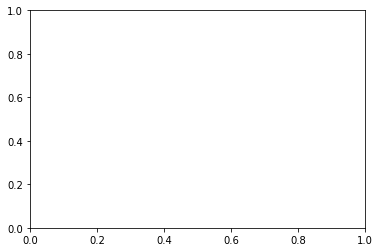

In [17]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

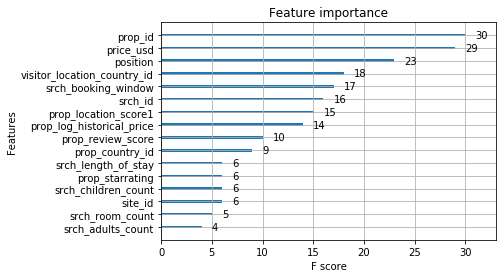

In [18]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [25]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [30]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
df['date_time'] = pd.DatetimeIndex(df['date_time']).month
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,target
2413677,162084,4,5,219,NaN,NaN,219,29479,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.0
2964240,199081,6,14,100,NaN,NaN,100,34221,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.0
4118844,276335,3,14,100,NaN,NaN,100,27665,3,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.0
1473705,98817,5,5,219,NaN,NaN,50,28826,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.0
39234,2605,6,5,219,NaN,NaN,134,105863,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.0


(10000, 54)
(10000,)
Feature: 0, Score: 0.00041
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00004
Feature: 3, Score: 0.00040
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00029
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00075
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00016
Feature: 18, Score: 0.00162
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00064
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00073
Feature: 26, Score: 0.00293
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00004
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00113
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 

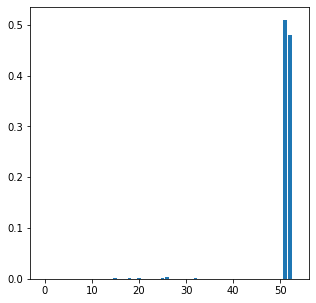

In [31]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# The columns that we will be making predictions with.
#X = df['srch_id','date_time','site_id','visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_destination_id','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','comp1_rate','comp1_inv','comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff','comp3_rate','comp3_inv','comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate','comp5_inv','comp5_rate_percent_diff','comp6_rate','comp6_inv','comp6_rate_percent_diff','comp7_rate','comp7_inv','comp7_rate_percent_diff','comp8_rate','comp8_inv','comp8_rate_percent_diff','click_bool','gross_bookings_usd','booking_bool']
# The column that we want to predict.
#y = df['target']
X, y = df.iloc[:,:-1],df.iloc[:,-1]
print(X.shape)
print(y.shape)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.28222
Feature: 1, Score: 0.04496
Feature: 2, Score: 0.03736
Feature: 3, Score: 0.03803
Feature: 4, Score: 0.03967
Feature: 5, Score: 0.04409
Feature: 6, Score: 0.04497
Feature: 7, Score: 0.06431
Feature: 8, Score: 0.04836
Feature: 9, Score: 0.04497
Feature: 10, Score: 0.04609
Feature: 11, Score: 0.03505
Feature: 12, Score: 0.04163
Feature: 13, Score: 0.04831
Feature: 14, Score: 0.04371
Feature: 15, Score: 0.05175
Feature: 16, Score: 0.04450


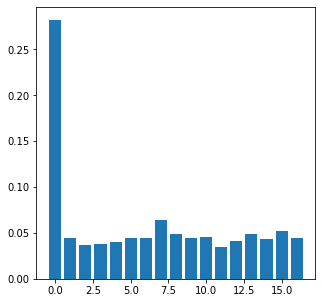

In [35]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# The columns that we will be making predictions with.
X = ['position','srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']
# The column that we want to predict.
y = ['target']
#X, y = df.iloc[:,:-1],df.iloc[:,-1]
# define the model
model = XGBClassifier()
# fit the model
model.fit(df[X], df[y])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'group_train' is not defined